In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 18})


In [207]:
names = [f"{j}_{i}" for i in ['0.1', '1', '10'] for j in ['ddos', 'spam', 'irc']]
netflow = [pd.read_parquet(f'../data/no_background/{j}_{i}s_netflow.parquet') for i in ['0.1', '1', '10'] for j in ['spam', 'ddos', 'irc']]
pcap = [pd.read_parquet(f'../data/no_background/{j}_{i}s_pcap.parquet') for i in ['0.1', '1', '10'] for j in ['spam', 'ddos', 'irc']]
netflow = [add_label(i).label for i in netflow]
pcap = [add_label(i, "n_packets").label for i in pcap]

In [208]:
for name, i in zip(names, netflow):
    print(name)
    print(i.value_counts())
    print()

ddos_0.1
1    1004454
0     160927
Name: label, dtype: int64

spam_0.1
1    207118
0    124758
Name: label, dtype: int64

irc_0.1
1    2931036
0     364418
Name: label, dtype: int64

ddos_1
1    101341
0     15200
Name: label, dtype: int64

spam_1
1    20846
0    12343
Name: label, dtype: int64

irc_1
1    293370
0     36179
Name: label, dtype: int64

ddos_10
1    10162
0     1494
Name: label, dtype: int64

spam_10
1    2170
0    1150
Name: label, dtype: int64

irc_10
1    29497
0     3461
Name: label, dtype: int64



In [209]:
for name, i in zip(names, pcap):
    print(name)
    print(i.value_counts())
    print()

ddos_0.1
0    103971
1     46984
Name: label, dtype: int64

spam_0.1
0    208738
1     39729
Name: label, dtype: int64

irc_0.1
0    366710
1    102098
Name: label, dtype: int64

ddos_1
1    92897
0    23654
Name: label, dtype: int64

spam_1
0    19846
1     5003
Name: label, dtype: int64

irc_1
0    25476
1    21408
Name: label, dtype: int64

ddos_10
1    10058
0     1600
Name: label, dtype: int64

spam_10
0    1593
1     894
Name: label, dtype: int64

irc_10
0    18077
1    14049
Name: label, dtype: int64



In [ ]:
netflow[0]

In [191]:
def add_label(data, total="n_conn"):
    label_col = 'label'
    data[label_col] = data[total] - data["n_normal"]
    data[label_col] = data[label_col].apply(lambda x: 1 if x > 0 else 0)
    return data

In [192]:
netflow_01 = add_label(netflow_01)
netflow_1 = add_label(netflow_1)
netflow_10 = add_label(netflow_10)
pcap_01 = add_label(pcap_01, "n_packets")
pcap_1 = add_label(pcap_1, "n_packets")
pcap_10 = add_label(pcap_10, "n_packets")

In [194]:
netflow_01.label.value_counts()

1    207118
0    124758
Name: label, dtype: int64

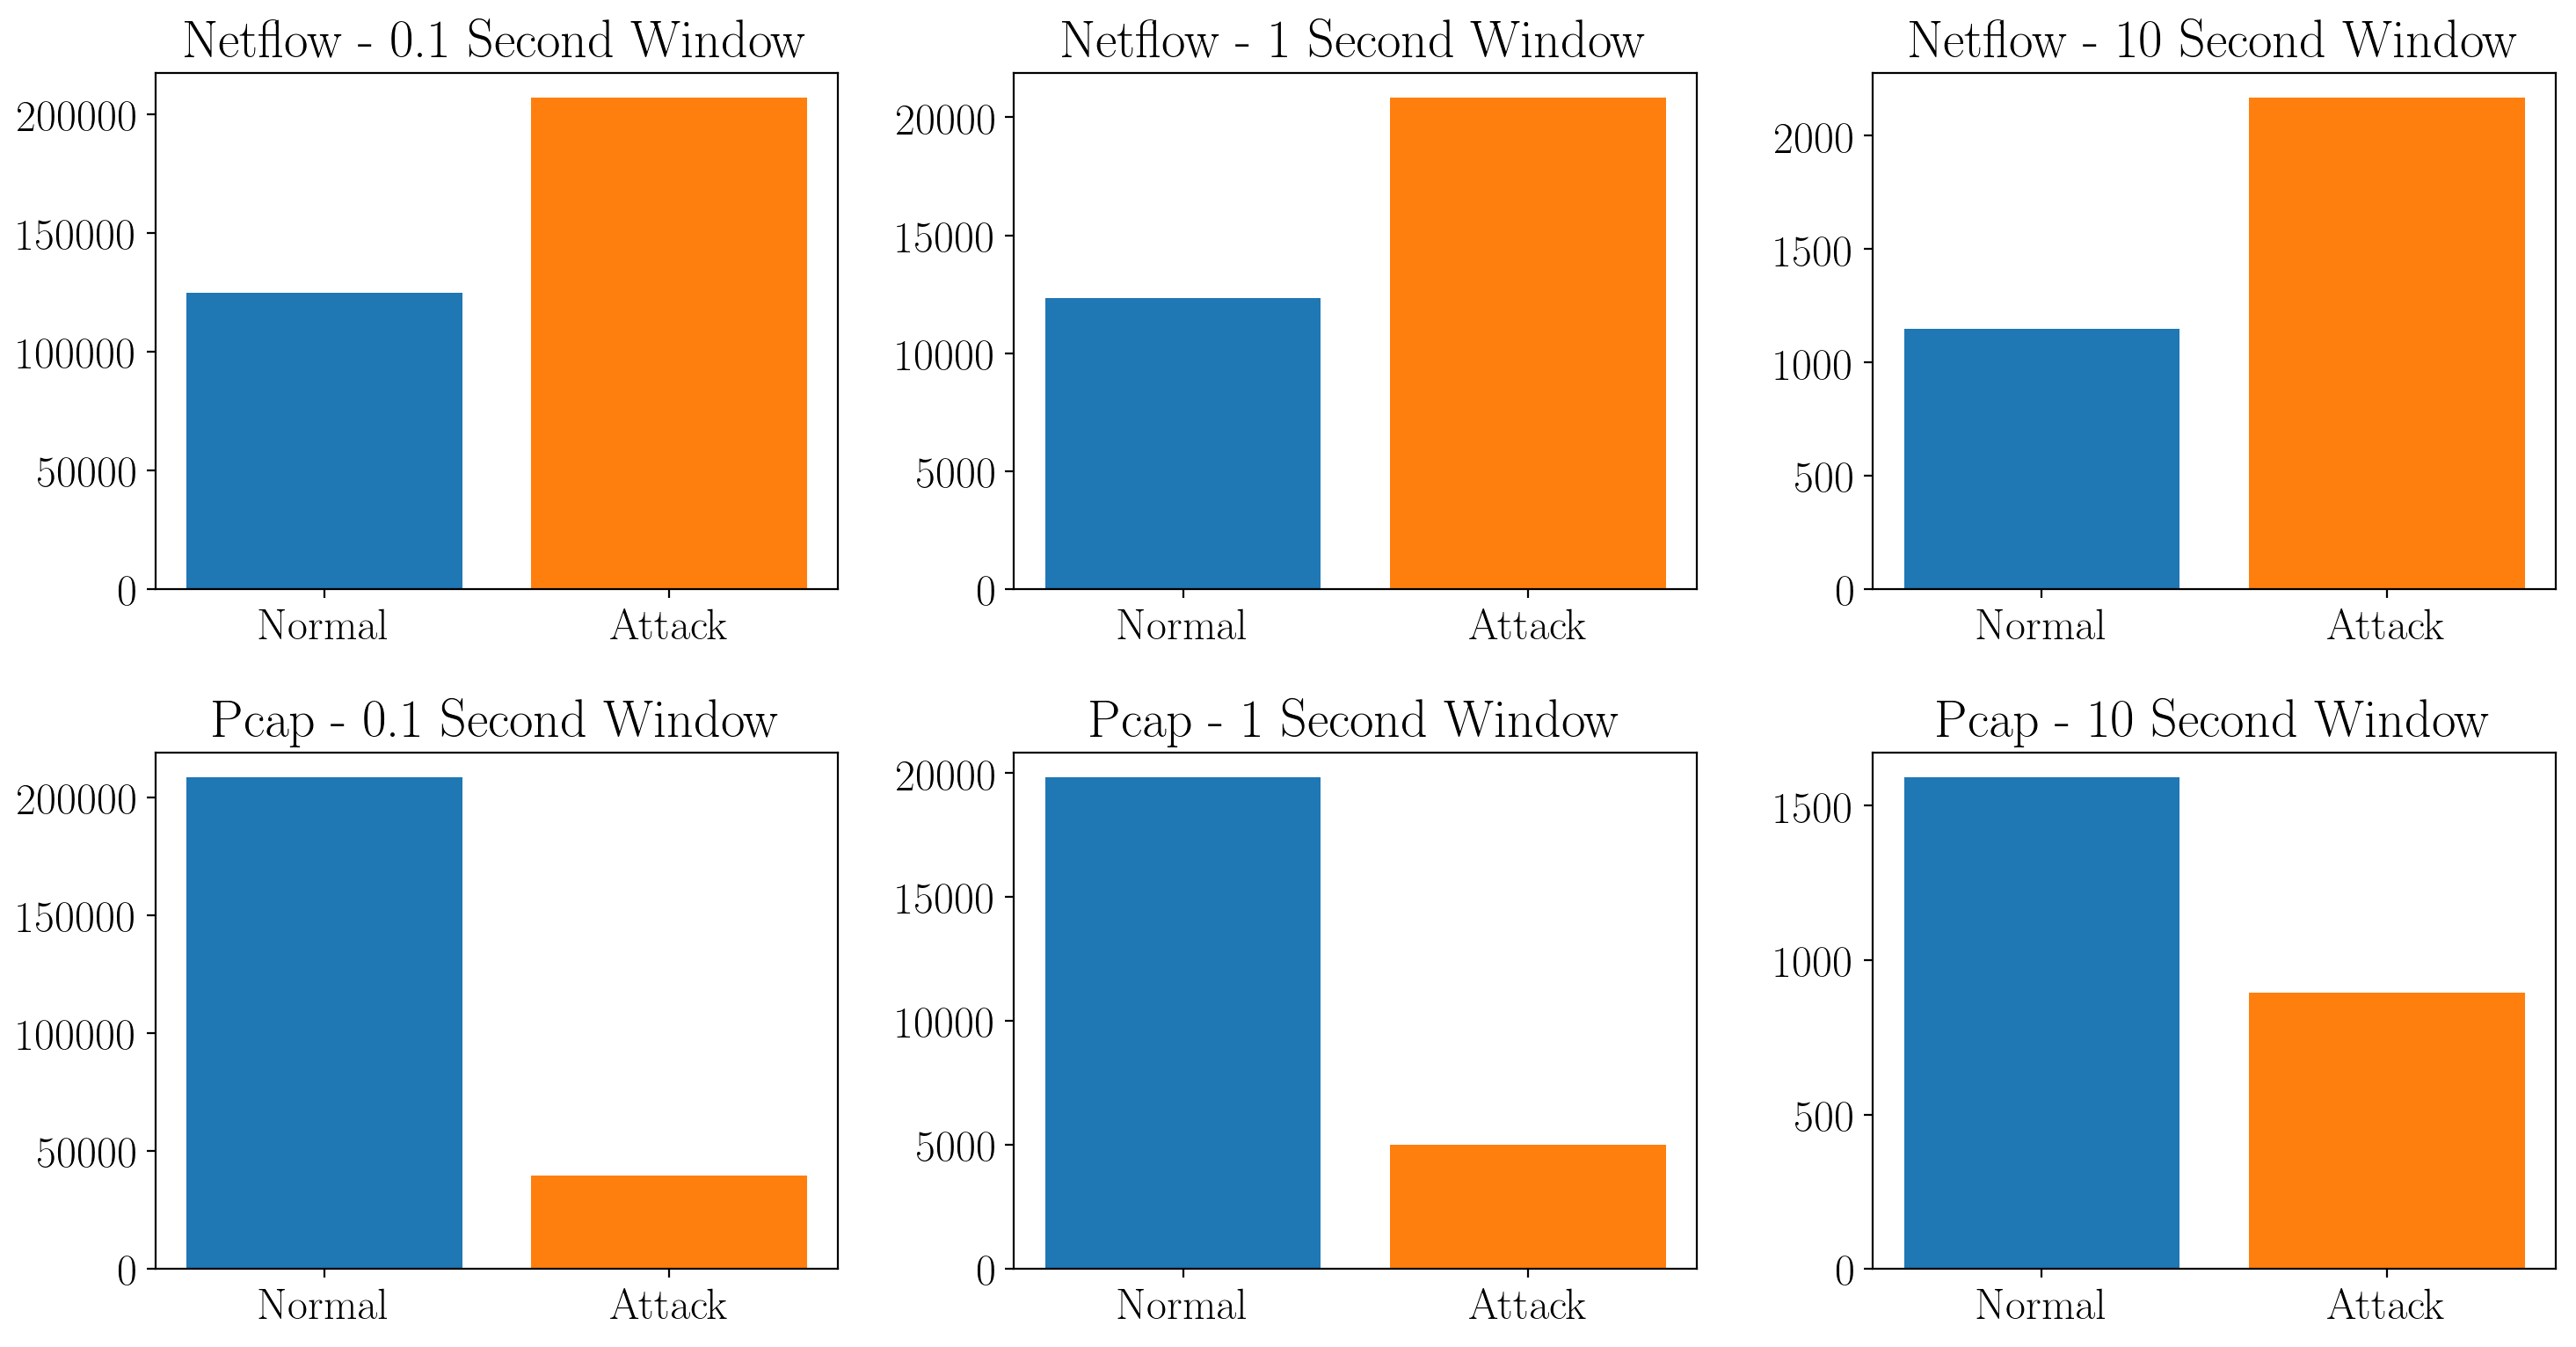

In [193]:
labels = ['Normal', 'Attack']
plt.figure(figsize=(15,8), dpi=200)
plt.subplot(231)
plt.title('Netflow - 0.1 Second Window')
plt.bar(0, netflow_01.label.value_counts()[0])
plt.bar(1, netflow_01.label.value_counts()[1])
plt.xticks([0,1],labels)

plt.subplot(232)
plt.title('Netflow - 1 Second Window')
plt.bar(0, netflow_1.label.value_counts()[0])
plt.bar(1, netflow_1.label.value_counts()[1])
plt.xticks([0,1],labels)

plt.subplot(233)
plt.title('Netflow - 10 Second Window')
plt.bar(0, netflow_10.label.value_counts()[0])
plt.bar(1, netflow_10.label.value_counts()[1])
plt.xticks([0,1],labels)

plt.subplot(234)
plt.title('Pcap - 0.1 Second Window')
plt.bar(0, pcap_01.label.value_counts()[0])
plt.bar(1, pcap_01.label.value_counts()[1])
plt.xticks([0,1],labels)

plt.subplot(235)
plt.title('Pcap - 1 Second Window')
plt.bar(0, pcap_1.label.value_counts()[0])
plt.bar(1, pcap_1.label.value_counts()[1])
plt.xticks([0,1],labels)

plt.subplot(236)
plt.title('Pcap - 10 Second Window')
plt.bar(0, pcap_10.label.value_counts()[0])
plt.bar(1, pcap_10.label.value_counts()[1])
plt.xticks([0,1],labels)
plt.tight_layout()
plt.savefig('figures/normal_attack_hist.jpg')

In [128]:
abnormal = (netflow_10.n_conn - netflow_10.n_normal).sum()
normal = netflow_10.n_normal.sum()

In [129]:
abnormal = (pcap_10.n_packets - pcap_10.n_normal).sum()
normal = pcap_10.n_normal.sum()

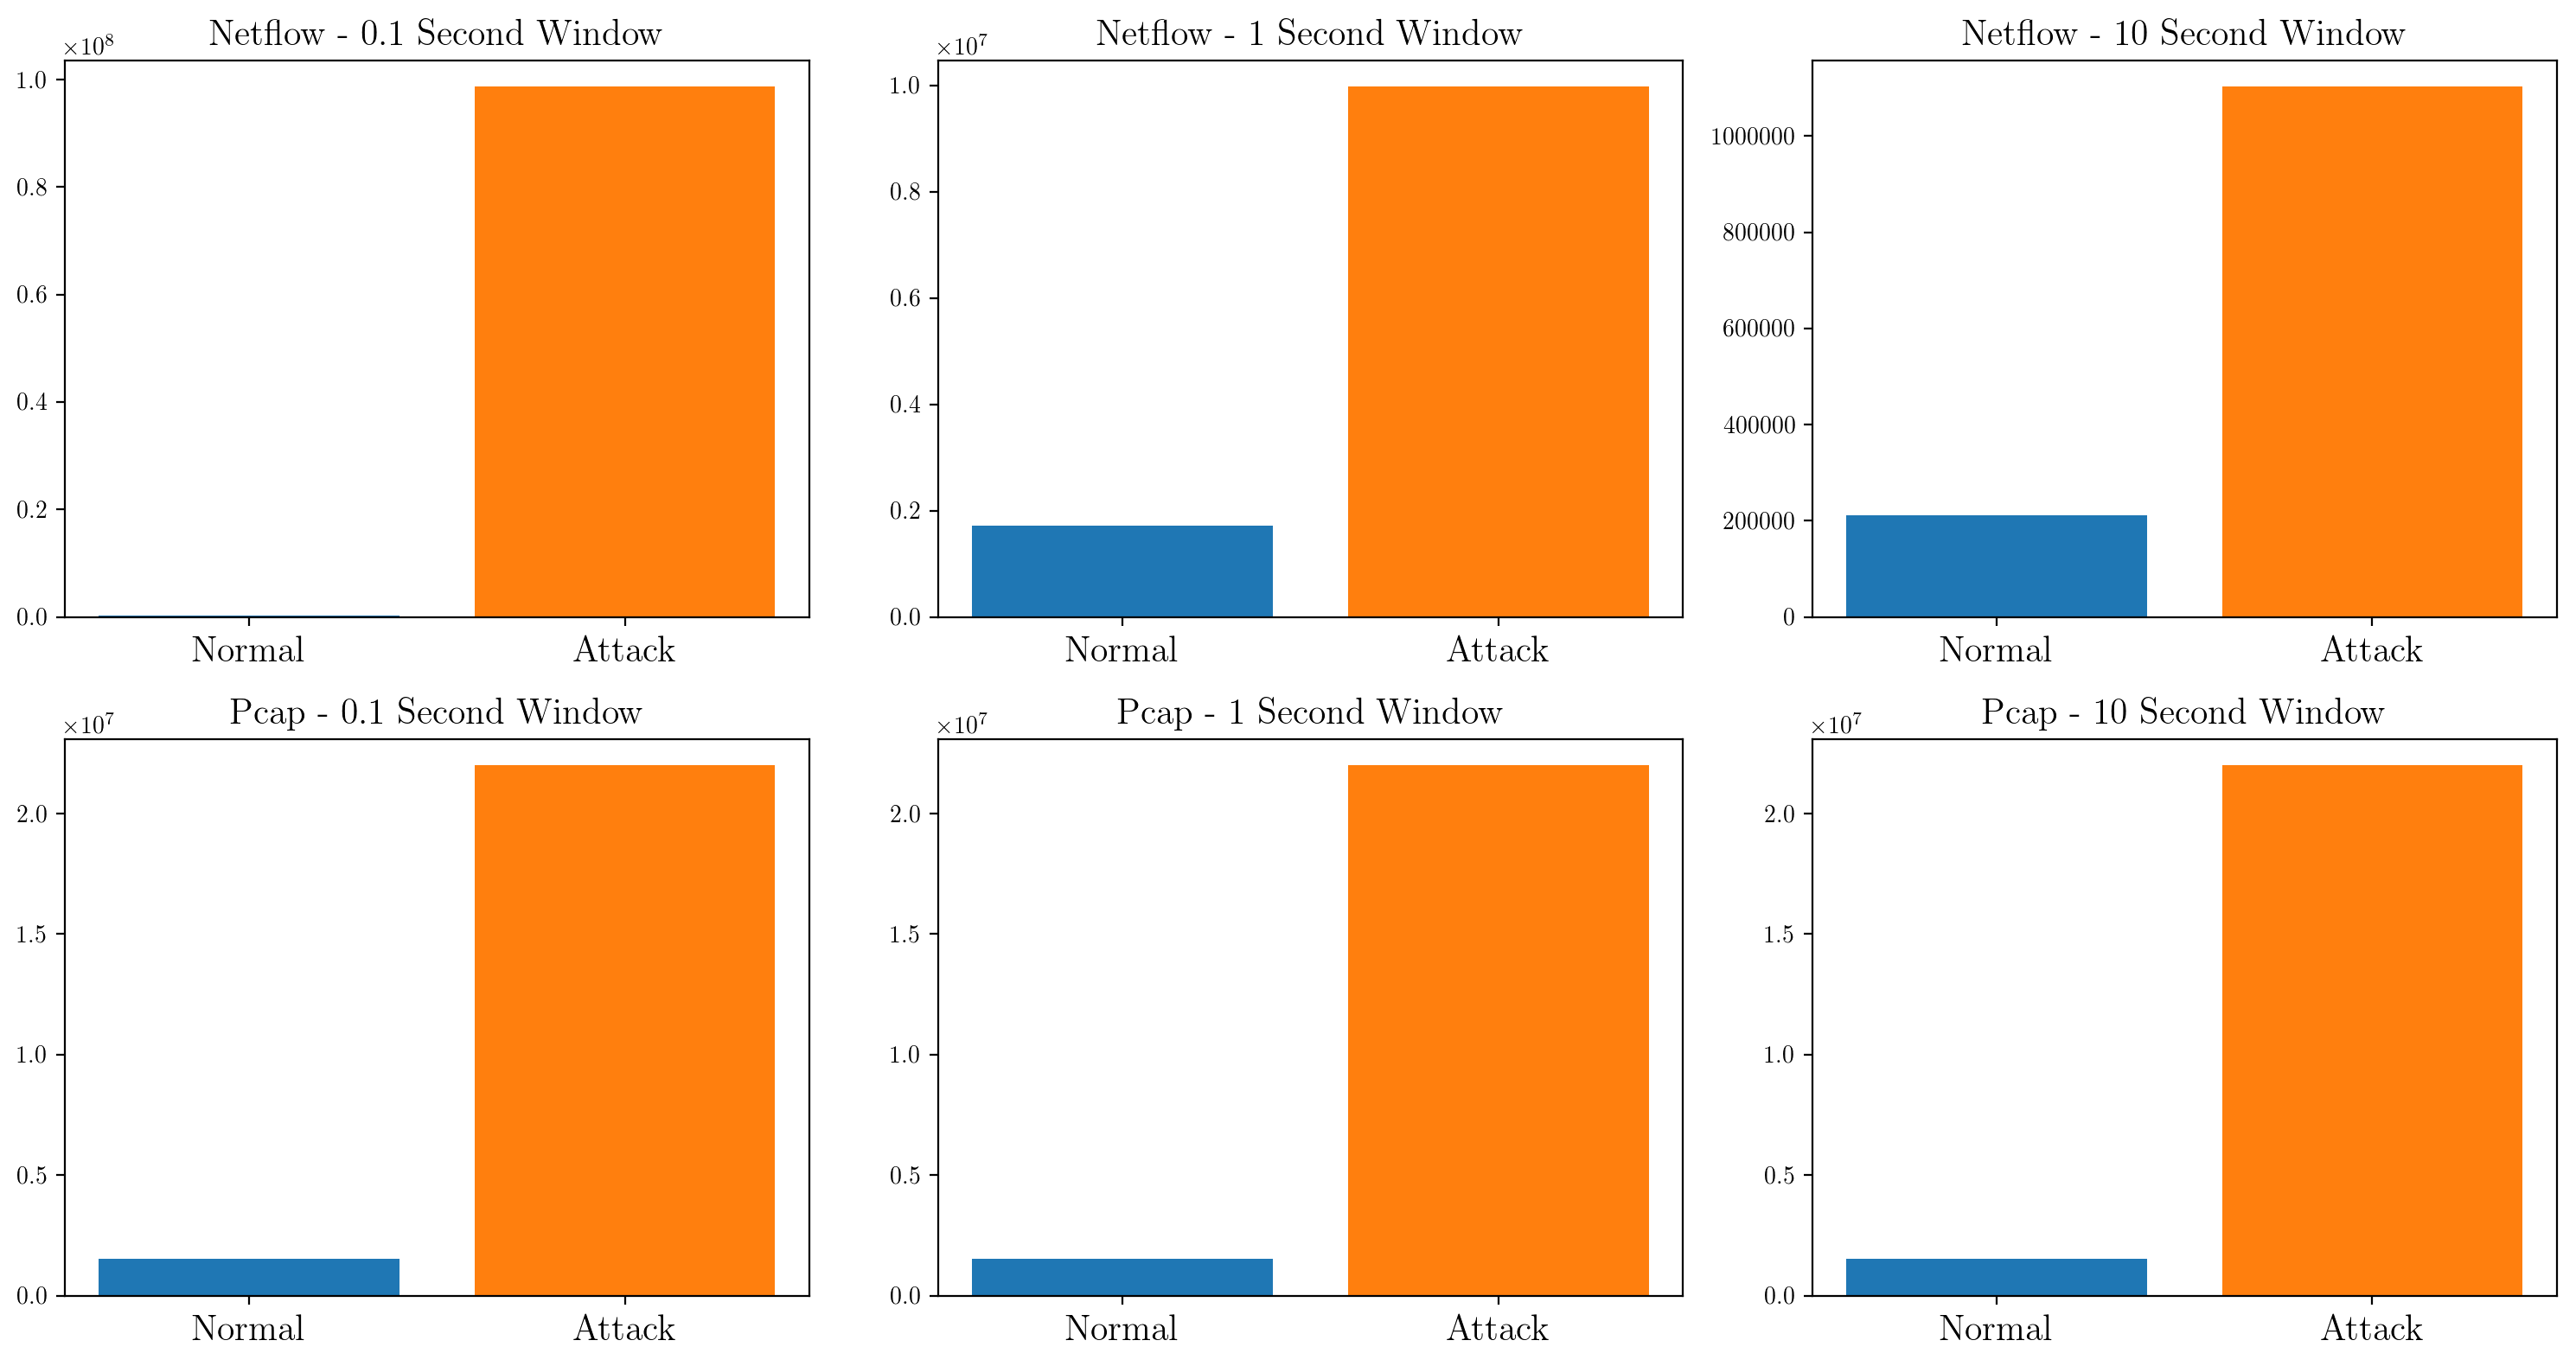

In [131]:
labels = ['Normal', 'Attack']
plt.figure(figsize=(15,8), dpi=200)

abnormal = (netflow_01.n_conn - netflow_01.n_normal).sum()
normal = netflow_10.n_normal.sum()
plt.subplot(231)
plt.title('Netflow - 0.1 Second Window', fontsize=font_size)
plt.bar(0, normal)
plt.bar(1, abnormal)
plt.xticks([0,1],labels, fontsize=font_size)

abnormal = (netflow_1.n_conn - netflow_1.n_normal).sum()
normal = netflow_1.n_normal.sum()
plt.subplot(232)
plt.title('Netflow - 1 Second Window', fontsize=font_size)
plt.bar(0, normal)
plt.bar(1, abnormal)
plt.xticks([0,1],labels, fontsize=font_size)

abnormal = (netflow_10.n_conn - netflow_10.n_normal).sum()
normal = netflow_10.n_normal.sum()
plt.subplot(233)
plt.title('Netflow - 10 Second Window', fontsize=font_size)
plt.bar(0, normal)
plt.bar(1, abnormal)
plt.xticks([0,1],labels, fontsize=font_size)

abnormal = (pcap_01.n_packets - pcap_01.n_normal).sum()
normal = pcap_01.n_normal.sum()
plt.subplot(234)
plt.title('Pcap - 0.1 Second Window', fontsize=font_size)
plt.bar(0, normal)
plt.bar(1, abnormal)
plt.xticks([0,1],labels, fontsize=font_size)

abnormal = (pcap_1.n_packets - pcap_1.n_normal).sum()
normal = pcap_1.n_normal.sum()
plt.subplot(235)
plt.title('Pcap - 1 Second Window', fontsize=font_size)
plt.bar(0, normal)
plt.bar(1, abnormal)
plt.xticks([0,1],labels, fontsize=font_size)

abnormal = (pcap_10.n_packets - pcap_10.n_normal).sum()
normal = pcap_10.n_normal.sum()
plt.subplot(236)
plt.title('Pcap - 10 Second Window', fontsize=font_size)
plt.bar(0, normal)
plt.bar(1, abnormal)
plt.xticks([0,1],labels, fontsize=font_size)
plt.tight_layout()
plt.savefig('figures/normal_attack_hist.jpg')

# Labels per Attack

In [166]:
ddos_pcap = pd.read_parquet('../data/no_background/ddos_10s_pcap.parquet')
spam_pcap = pd.read_parquet('../data/no_background/spam_10s_pcap.parquet')
irc_pcap = pd.read_parquet('../data/no_background/irc_10s_pcap.parquet')

ddos_netflow = pd.read_parquet('../data/no_background/ddos_10s_netflow.parquet')
spam_netflow = pd.read_parquet('../data/no_background/spam_10s_netflow.parquet')
irc_netflow = pd.read_parquet('../data/no_background/irc_10s_netflow.parquet')

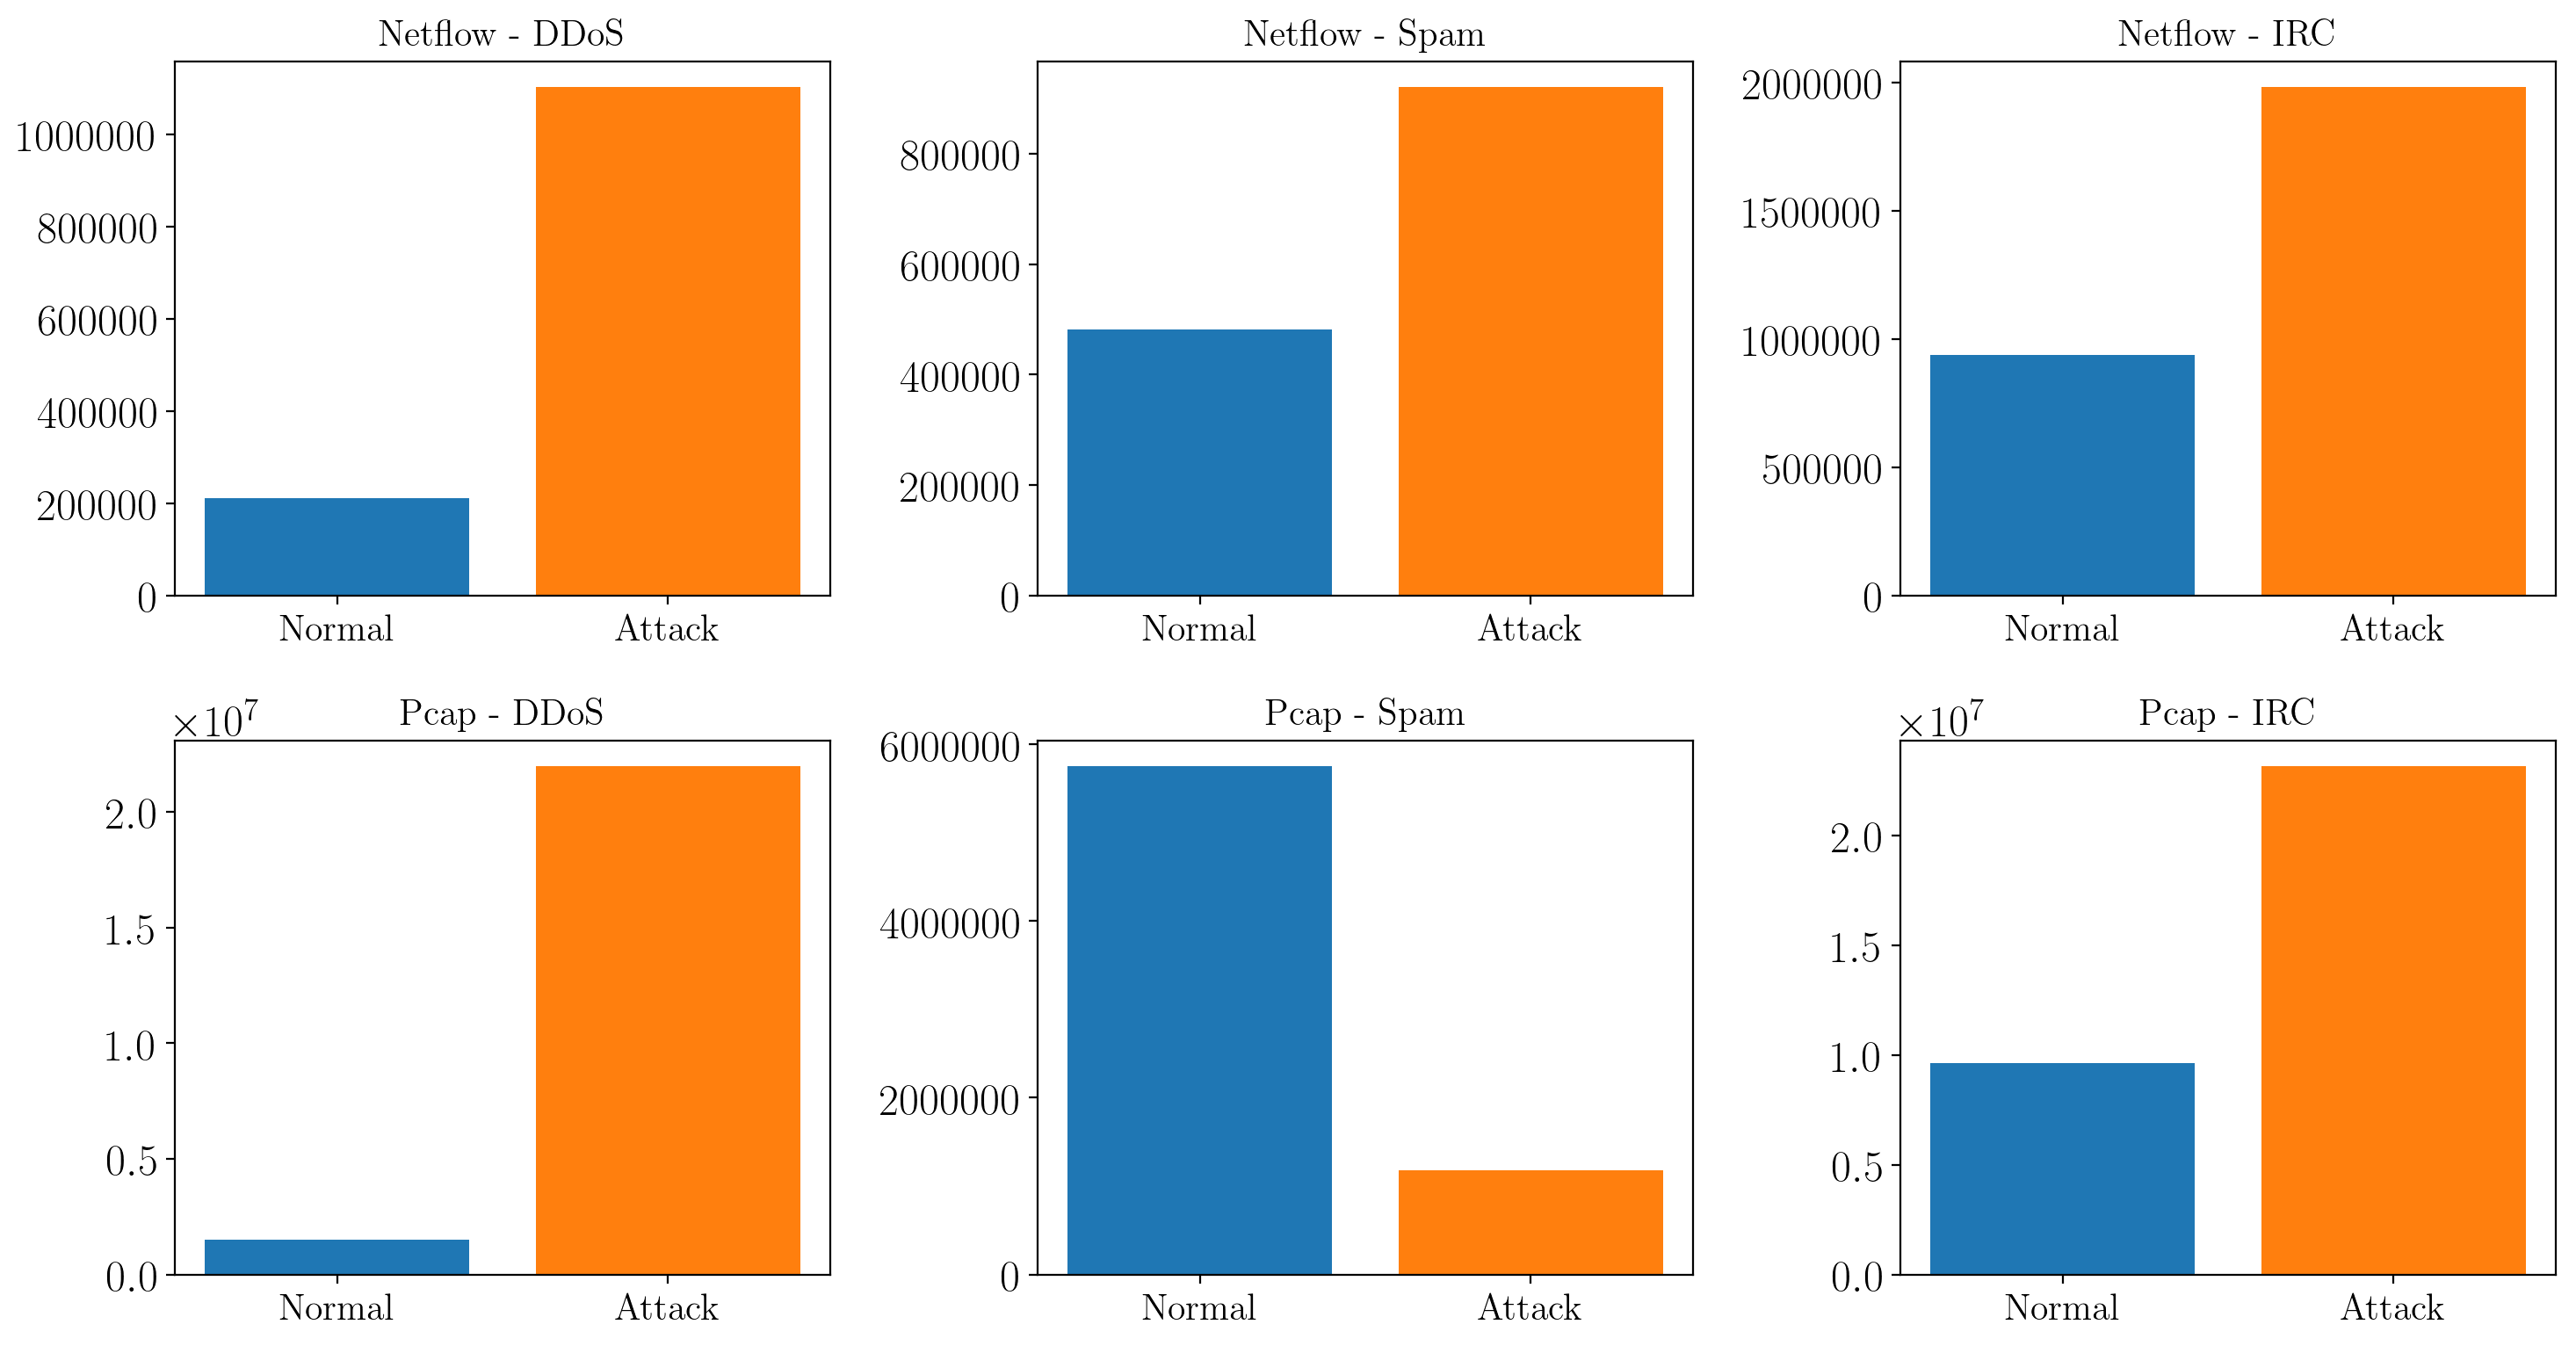

In [167]:
labels = ['Normal', 'Attack']
plt.figure(figsize=(15,8), dpi=200)

abnormal = (ddos_netflow.n_conn - ddos_netflow.n_normal).sum()
normal = ddos_netflow.n_normal.sum()
plt.subplot(231)
plt.title('Netflow - DDoS', fontsize=font_size)
plt.bar(0, normal)
plt.bar(1, abnormal)
plt.xticks([0,1],labels, fontsize=font_size)

abnormal = (spam_netflow.n_conn - spam_netflow.n_normal).sum()
normal = spam_netflow.n_normal.sum()
plt.subplot(232)
plt.title('Netflow - Spam', fontsize=font_size)
plt.bar(0, normal)
plt.bar(1, abnormal)
plt.xticks([0,1],labels, fontsize=font_size)

abnormal = (irc_netflow.n_conn - irc_netflow.n_normal).sum()
normal = irc_netflow.n_normal.sum()
plt.subplot(233)
plt.title('Netflow - IRC', fontsize=font_size)
plt.bar(0, normal)
plt.bar(1, abnormal)
plt.xticks([0,1],labels, fontsize=font_size)

abnormal = (ddos_pcap.n_abnormal).sum()
normal = ddos_pcap.n_normal.sum()
plt.subplot(234)
plt.title('Pcap - DDoS', fontsize=font_size)
plt.bar(0, normal)
plt.bar(1, abnormal)
plt.xticks([0,1],labels, fontsize=font_size)

abnormal = (spam_pcap.n_abnormal).sum()
normal = spam_pcap.n_normal.sum()
plt.subplot(235)
plt.title('Pcap - Spam', fontsize=font_size)
plt.bar(0, normal)
plt.bar(1, abnormal)
plt.xticks([0,1],labels, fontsize=font_size)

abnormal = (irc_pcap.n_abnormal).sum()
normal = irc_pcap.n_normal.sum()
plt.subplot(236)
plt.title('Pcap - IRC', fontsize=font_size)
plt.bar(0, normal)
plt.bar(1, abnormal)
plt.xticks([0,1],labels, fontsize=font_size)
plt.tight_layout()
plt.savefig('figures/normal_attack_hist.jpg')

In [180]:
import os
PCAP_DIR = "/data/saed/network/data/pcap_files_csv/"
PCAP_SPAM_FILES = [
    os.path.join(PCAP_DIR, "capture201108%s.parquet" % i)
    for i in ["10", "11", "15-2", "17", "15-3"]
]

NETFLOW_DIR = "/data/saed/network/data/netflow_files_csv/"
NETFLOW_SPAM_FILES = [
    os.path.join(NETFLOW_DIR, "capture201108%s.binetflow" % i)
    for i in ["10", "11", "15-2", "17", "15-3"]
]

MALICIOUS = set(
    [
        "147.32.84.165",  # 15
        "147.32.84.165",
        "147.32.84.191",
        "147.32.84.192",  # 18-2
        "147.32.84.165",
        "147.32.84.191",
        "147.32.84.192",
        "147.32.84.193",
        "147.32.84.204",
        "147.32.84.205",
        "147.32.84.206",
        "147.32.84.207",
        "147.32.84.208",
        "147.32.84.209",
    ]
)  # 18

NORMAL = set(
    [
        "147.32.84.170",
        "147.32.84.134",
        "147.32.84.164",
        "147.32.87.36",
        "147.32.80.9",
        "147.32.87.11",  # 15
        "147.32.84.170",
        "147.32.84.134",
        "147.32.84.164",
        "147.32.87.36",
        "147.32.80.9",
        "147.32.87.11",  # 18-2
        "147.32.84.170",
        "147.32.84.134",
        "147.32.84.164",
        "147.32.87.36",
        "147.32.80.9",
        "147.32.87.11",
    ]
)

In [170]:
data = [pd.read_parquet(i) for i in PCAP_SPAM_FILES]

In [178]:
normal = 0
abnormal = 0
for i in data:
    normal += i['ip.src'].isin(NORMAL).sum()
    abnormal += i['ip.src'].isin(MALICIOUS).sum()
print(normal)
print(abnormal)

5758304
1178615


In [182]:
data2 = [pd.read_csv(i) for i in NETFLOW_SPAM_FILES]

In [185]:
data2[0].columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

In [188]:
normal = 0
abnormal = 0
for i in data2:
    normal += i[i['SrcAddr'].isin(NORMAL)].TotPkts.sum()
    abnormal += i[i['SrcAddr'].isin(MALICIOUS)].TotPkts.sum()
print(normal)
print(abnormal)

2491372
2218061


In [177]:
abnormal

119011

# Ditched Stuff

In [81]:
def create_transitional_label(data):
    label1 = data.label.values[:-1]
    label2 = data.label.values[1:]
    final_label = label1 * 2 + label2
    final_label = np.append(final_label, 0)
    return final_label

In [82]:
netflow_01['label2'] = create_transitional_label(netflow_01)
netflow_1['label2'] = create_transitional_label(netflow_1)
netflow_10['label2'] = create_transitional_label(netflow_10)
pcap_01['label2'] = create_transitional_label(pcap_01)
pcap_1['label2'] = create_transitional_label(pcap_1)
pcap_10['label2'] = create_transitional_label(pcap_10)

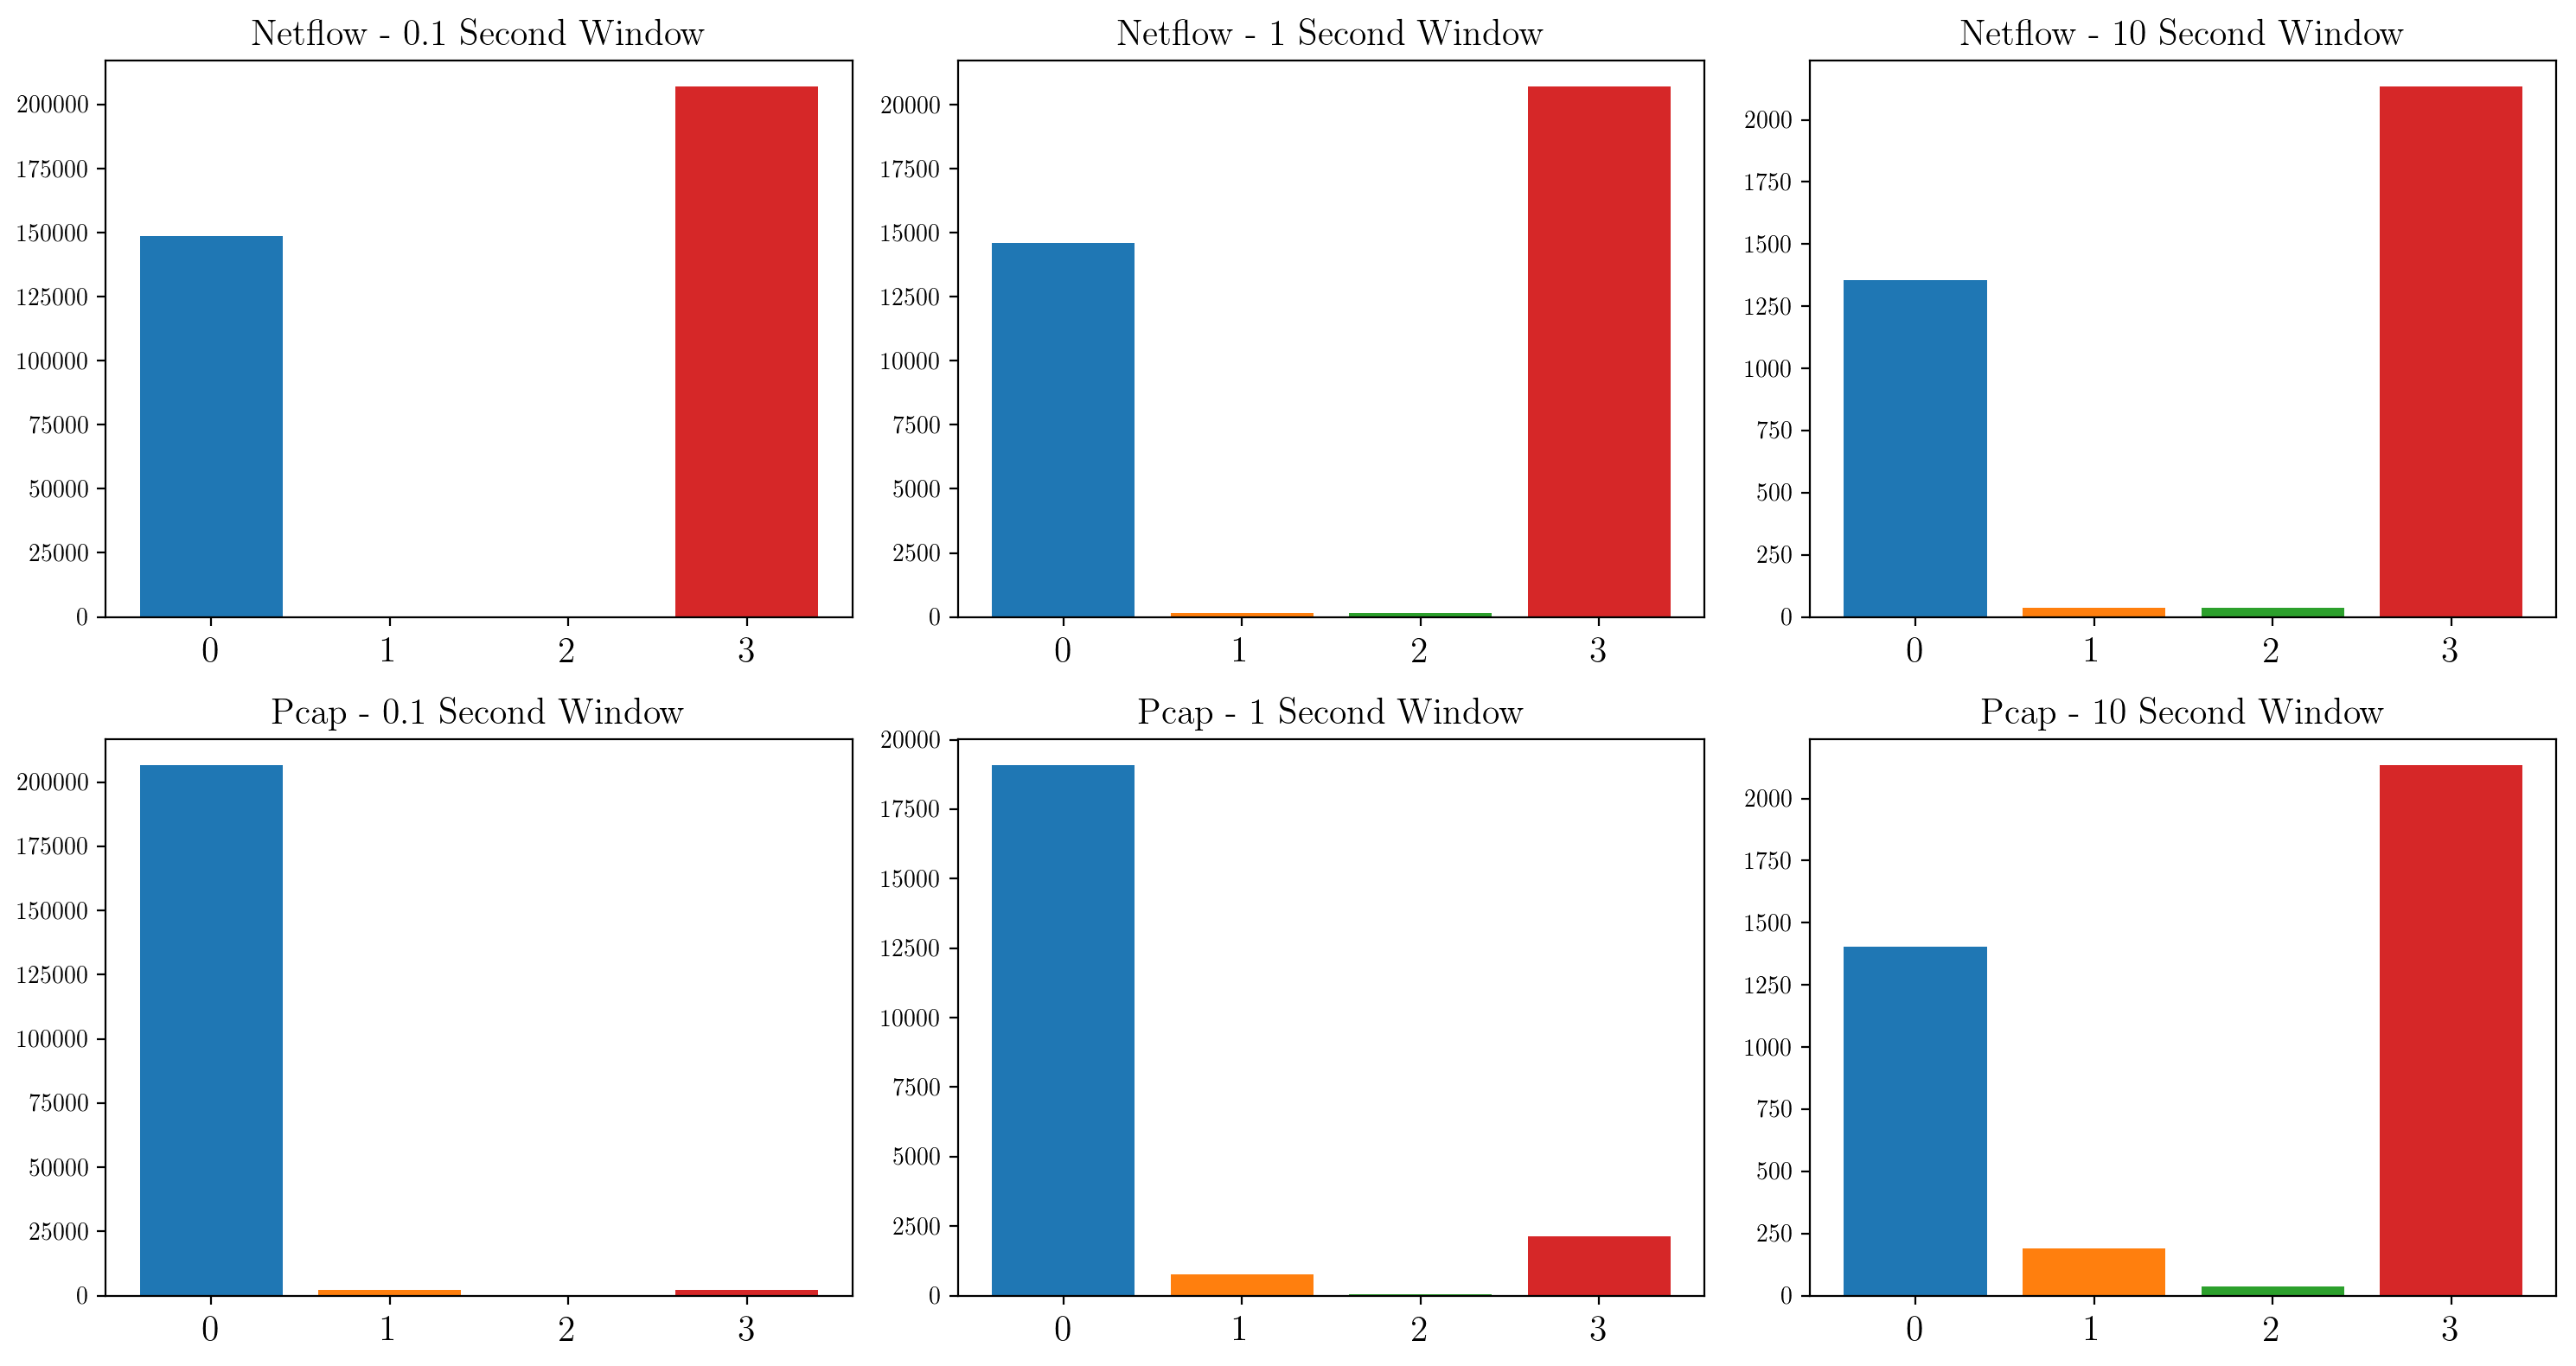

In [91]:
labels = ['0', '1', '2', '3']
plt.figure(figsize=(15,8), dpi=200)
plt.subplot(231)
plt.title('Netflow - 0.1 Second Window', fontsize=font_size)
plt.bar(0, netflow_01.label2.value_counts()[0])
plt.bar(1, netflow_01.label2.value_counts()[1])
plt.bar(2, netflow_01.label2.value_counts()[2])
plt.bar(3, netflow_01.label2.value_counts()[3])
plt.xticks([0,1,2,3], labels, fontsize=font_size)

plt.subplot(232)
plt.title('Netflow - 1 Second Window', fontsize=font_size)
plt.bar(0, netflow_1.label2.value_counts()[0])
plt.bar(1, netflow_1.label2.value_counts()[1])
plt.bar(2, netflow_1.label2.value_counts()[2])
plt.bar(3, netflow_1.label2.value_counts()[3])
plt.xticks([0,1,2,3], labels, fontsize=font_size)

plt.subplot(233)
plt.title('Netflow - 10 Second Window', fontsize=font_size)
plt.bar(0, netflow_10.label2.value_counts()[0])
plt.bar(1, netflow_10.label2.value_counts()[1])
plt.bar(2, netflow_10.label2.value_counts()[2])
plt.bar(3, netflow_10.label2.value_counts()[3])
plt.xticks([0,1,2,3], labels, fontsize=font_size)

plt.subplot(234)
plt.title('Pcap - 0.1 Second Window', fontsize=font_size)
plt.bar(0, pcap_01.label2.value_counts()[0])
plt.bar(1, pcap_01.label2.value_counts()[1])
plt.bar(2, netflow_10.label2.value_counts()[2])
plt.bar(3, netflow_10.label2.value_counts()[3])
plt.xticks([0,1,2,3], labels, fontsize=font_size)

plt.subplot(235)
plt.title('Pcap - 1 Second Window', fontsize=font_size)
plt.bar(0, pcap_1.label2.value_counts()[0])
plt.bar(1, pcap_1.label2.value_counts()[1])
plt.bar(2, netflow_10.label2.value_counts()[2])
plt.bar(3, netflow_10.label2.value_counts()[3])
plt.xticks([0,1,2,3], labels, fontsize=font_size)

plt.subplot(236)
plt.title('Pcap - 10 Second Window', fontsize=font_size)
plt.bar(0, pcap_10.label2.value_counts()[0])
plt.bar(1, pcap_10.label2.value_counts()[1])
plt.bar(2, netflow_10.label2.value_counts()[2])
plt.bar(3, netflow_10.label2.value_counts()[3])
plt.xticks([0,1,2,3], labels, fontsize=font_size)
plt.tight_layout()
plt.savefig('figures/transitional_hist.jpg')